
--- 1. DATA LOADING---

Columns converted to whole numbers: ['age', 'workout_frequency (days/week)', 'experience_level', 'daily meals frequency']

First 5 rows of data:
| age   | gender   | weight (kg)   | height (m)   | max_bpm   | avg_bpm   | resting_bpm   | session_duration (hours)   | calories_burned   | workout_type   | fat_percentage   | water_intake (liters)   | workout_frequency (days/week)   | experience_level   | bmi   | daily meals frequency   | physical exercise   | carbs   | proteins   | fats   | calories   | meal_name   | meal_type   | diet_type   | sugar_g   | sodium_mg   | cholesterol_mg   | serving_size_g   | cooking_method   | prep_time_min   | cook_time_min   | rating   | name of exercise   | sets   | reps   | benefit                                         | burns calories (per 30 min)   | target muscle group   | equipment needed       | difficulty level   | body part   | type of muscle   | workout                | bmi_calc   | cal_from_macros   | pct_carbs   | pro

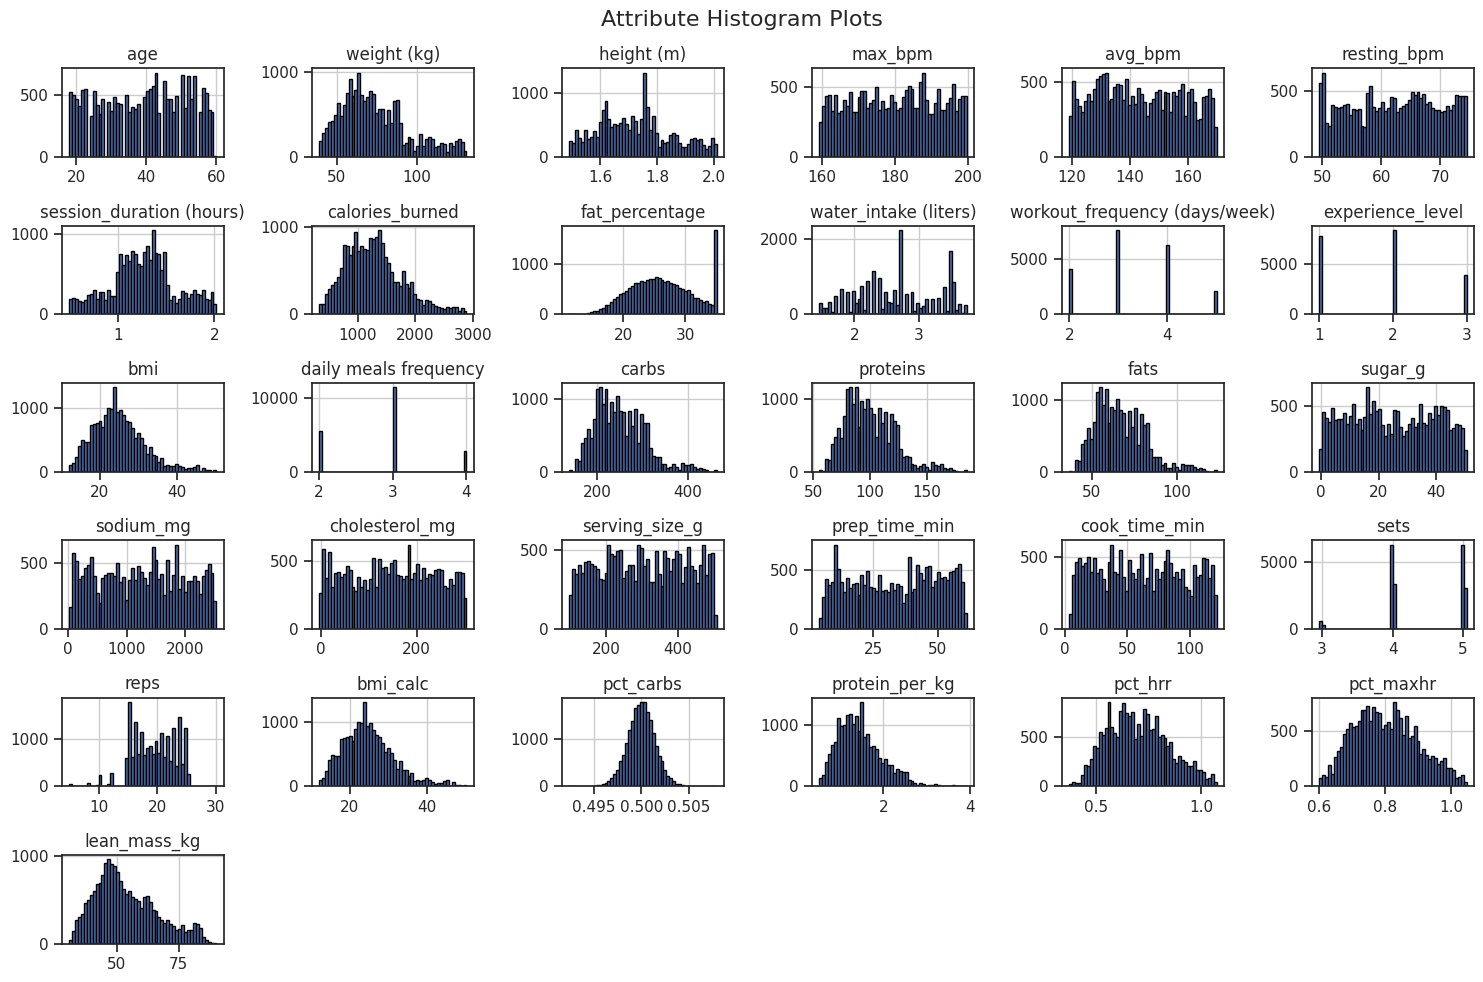


--- 2.2 VISUALIZATION: CATEGORICAL FEATURE BAR PLOTS (Frequency) ---


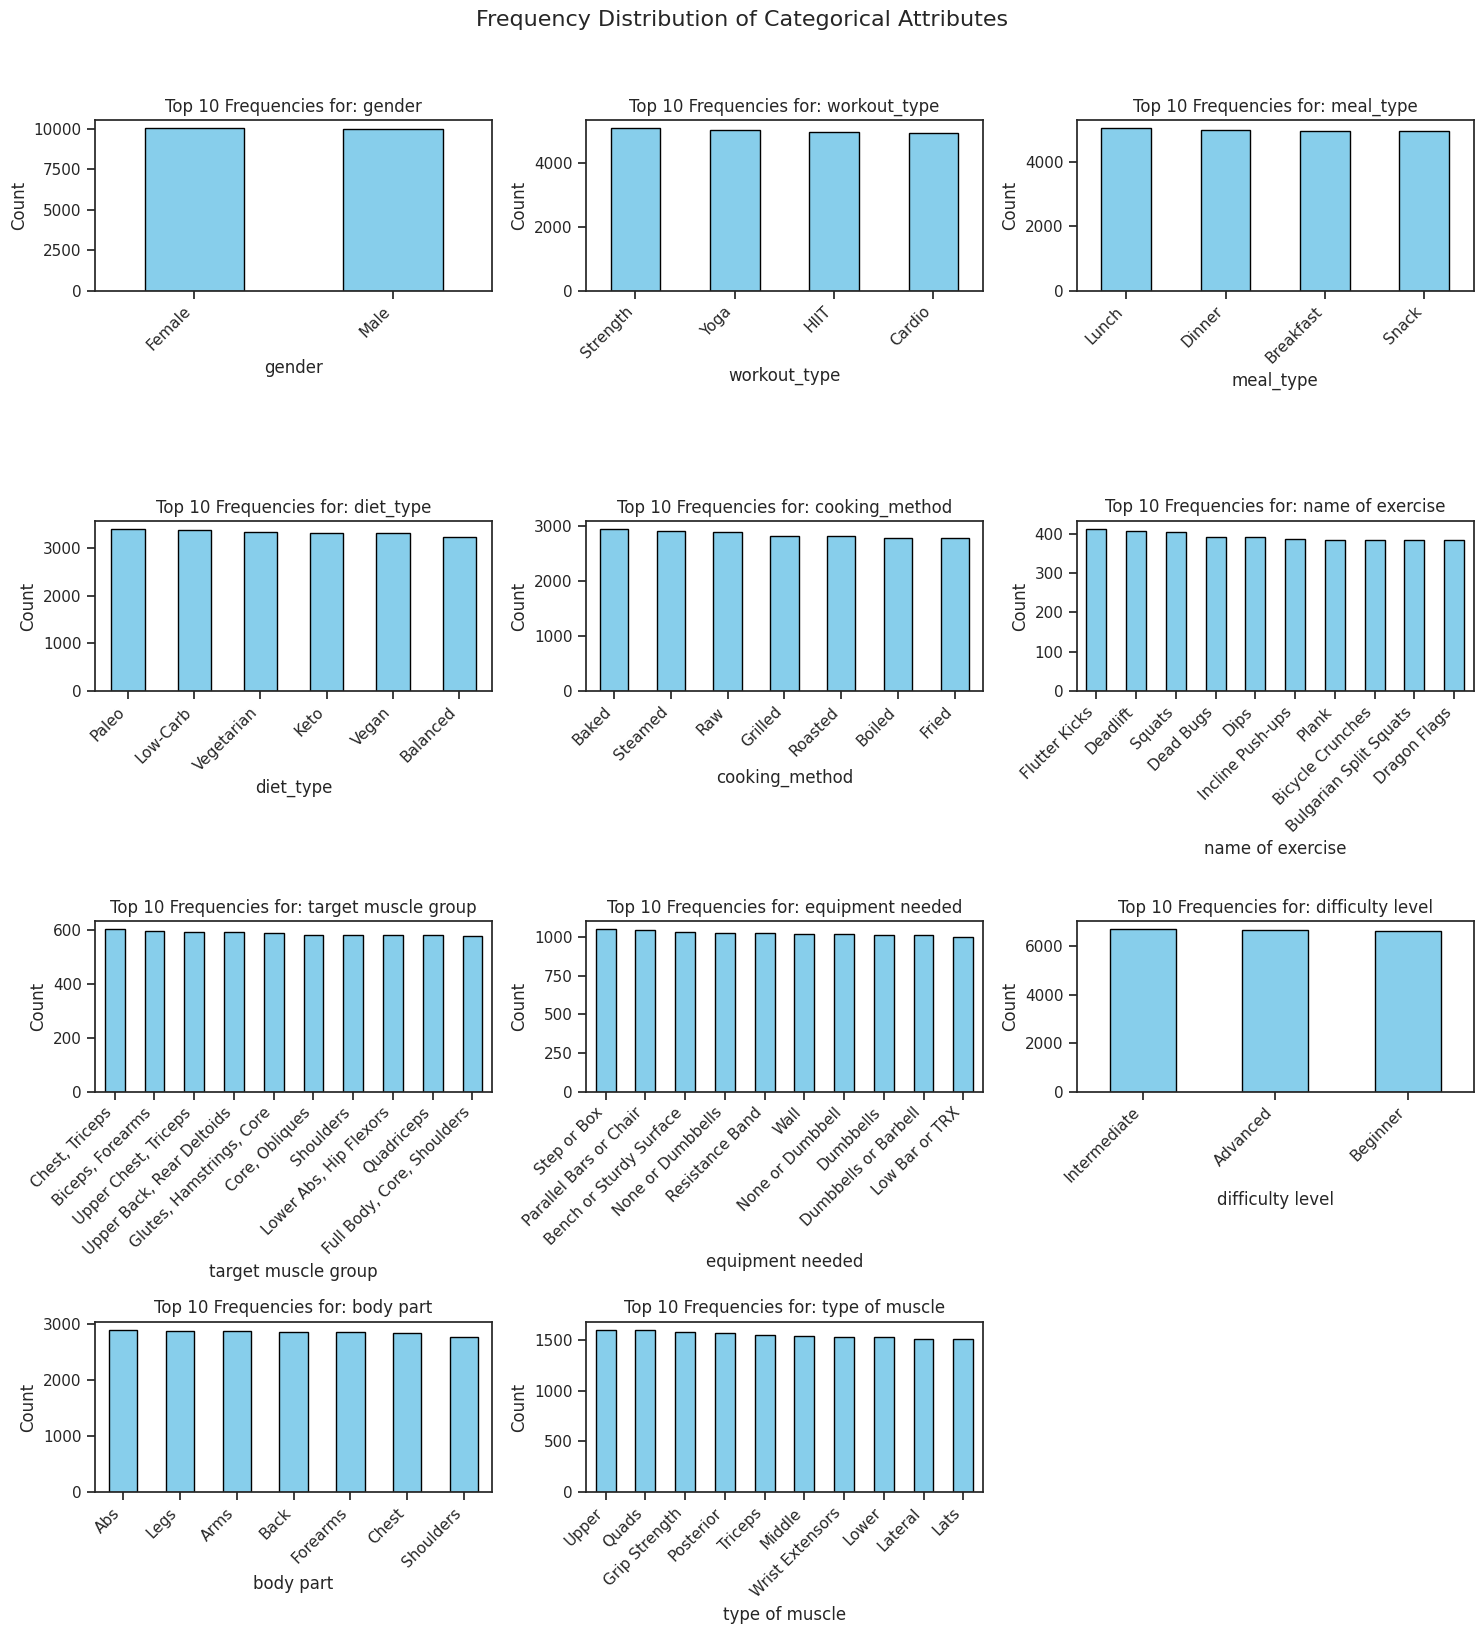


--- 2.3 VISUALIZATION: BOX PLOTS (Categorical Features vs. Target) ---


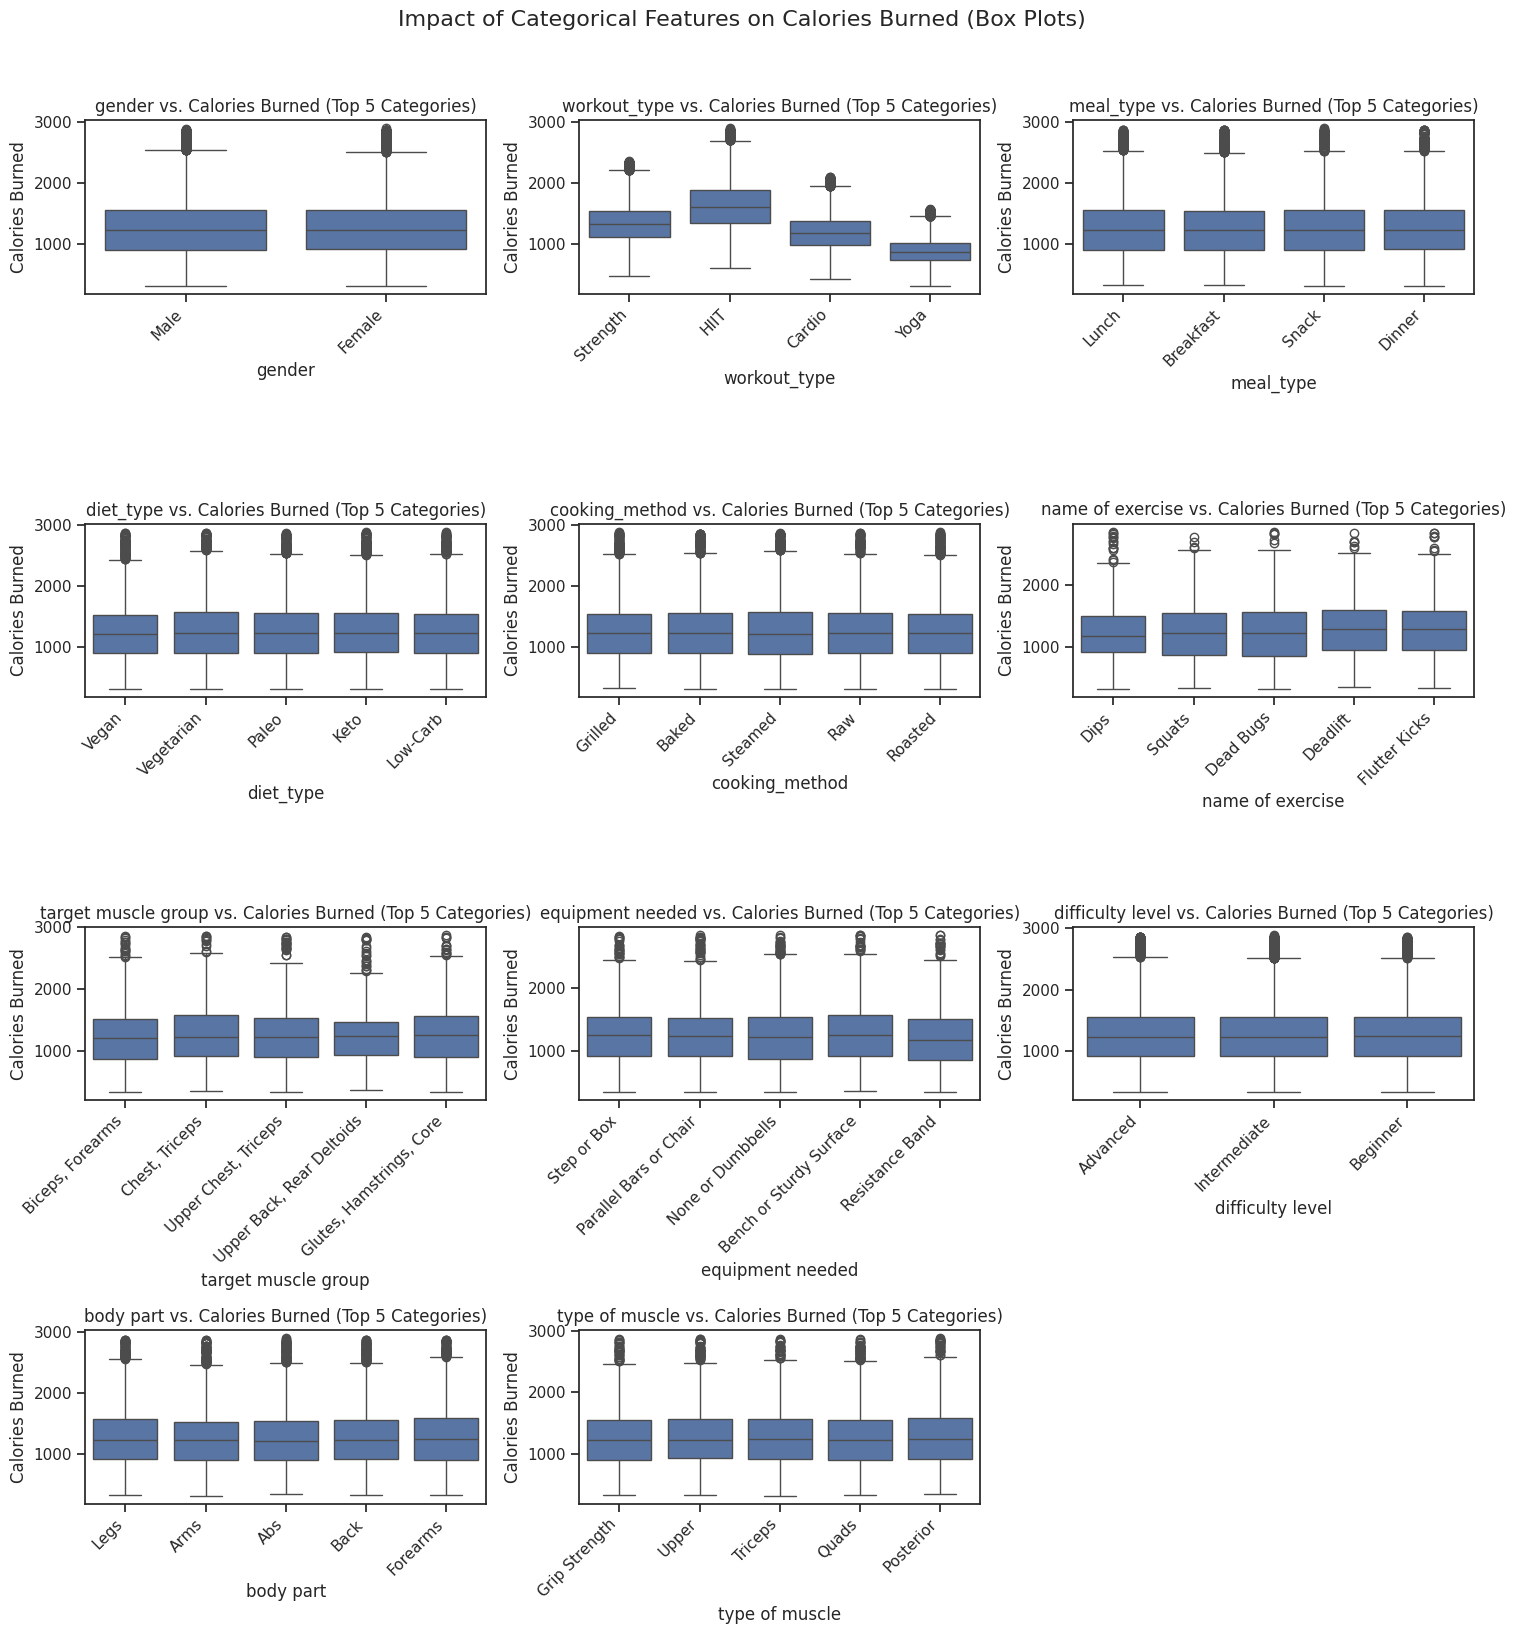


--- 2.4 CORRELATION HEATMAP ---


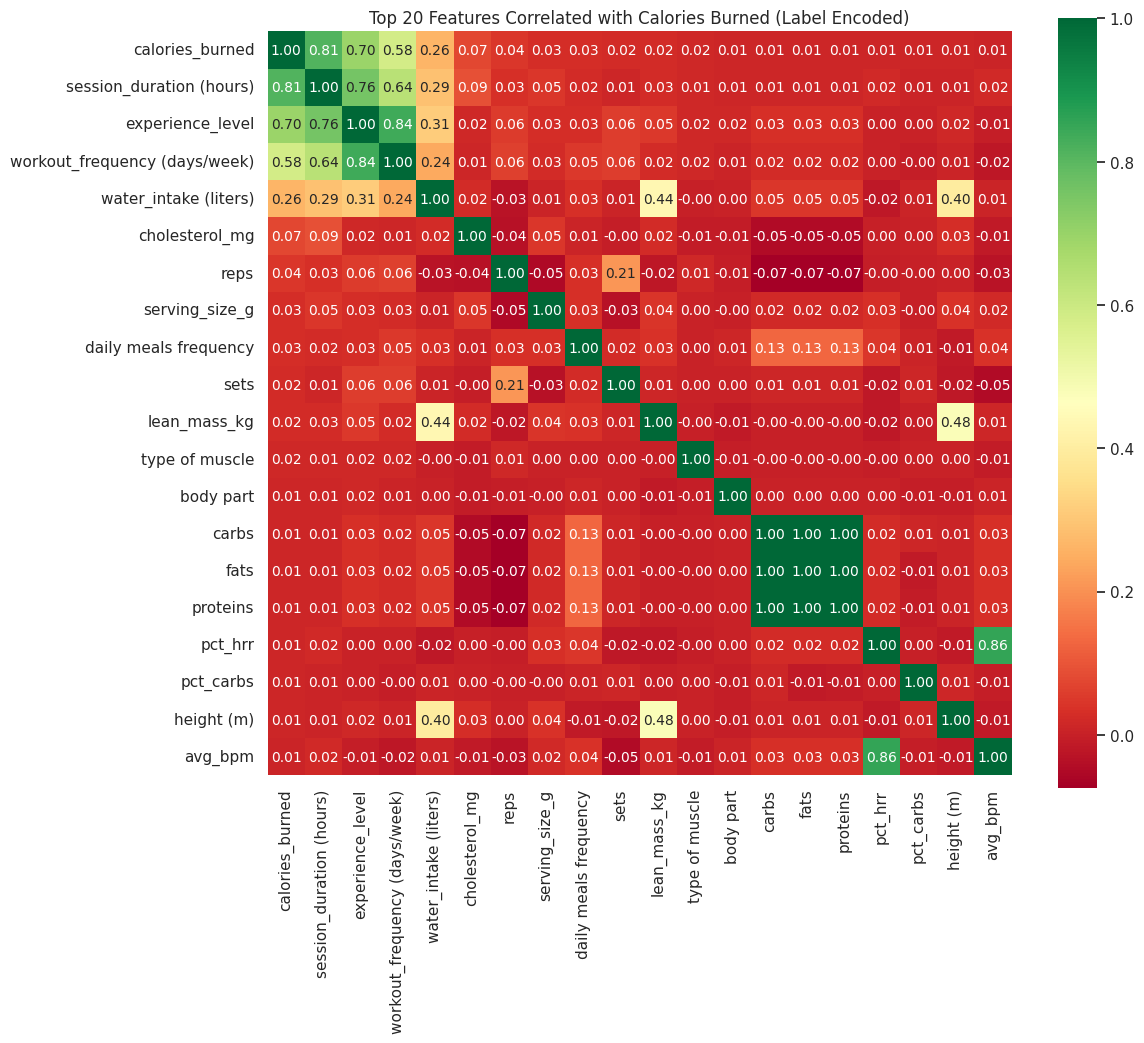


 Correlation Coefficients with 'calories_burned':
|                               | calories_burned   |
|:------------------------------|:------------------|
| calories_burned               | 1                 |
| session_duration (hours)      | 0.814368          |
| experience_level              | 0.696686          |
| workout_frequency (days/week) | 0.583108          |
| water_intake (liters)         | 0.262731          |
| cholesterol_mg                | 0.072296          |
| reps                          | 0.043237          |
| serving_size_g                | 0.0294577         |
| daily meals frequency         | 0.0280799         |
| sets                          | 0.0241636         |
| lean_mass_kg                  | 0.0231345         |
| type of muscle                | 0.0151156         |
| body part                     | 0.0132166         |
| carbs                         | 0.011929          |
| fats                          | 0.0117693         |
| proteins                     

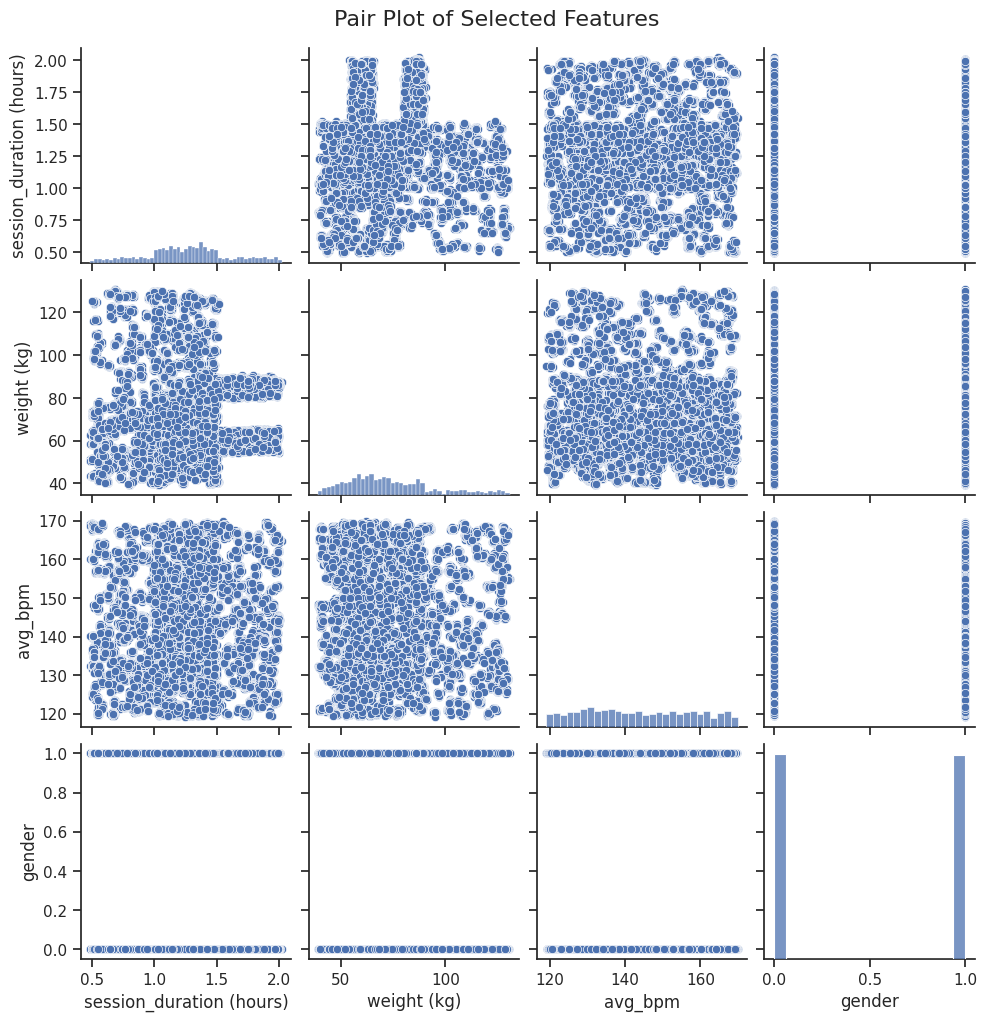


--- 3. CLEANING, PREPROCESSING & ONE-HOT ENCODING ---
Original Data Shape: (19469, 43)
Encoded Data Shape: (19469, 189)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import os

from sklearn.preprocessing import StandardScaler, LabelEncoder

# ==========================================
# 1. LOAD DATA
# ==========================================
print("\n--- 1. DATA LOADING---")
df = pd.read_csv('Final_data.csv')

# Standardize column names to lowercase (as per example)
df.columns = [x.lower() for x in df.columns]

# Convert specific columns to Whole Numbers (Integers)
cols_to_round = ['age', 'workout_frequency (days/week)', 'experience_level', 'daily meals frequency']

for col in cols_to_round:
    # 1. Round to nearest whole number
    # 2. Convert to integer type
    df[col] = df[col].round().astype(int)

print("\nColumns converted to whole numbers:", cols_to_round)

print("\nFirst 5 rows of data:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nData Shape (Rows, Columns):")
print(df.shape)

df = df.drop(columns=['meal_name','benefit','workout','calories', 'cal_balance', 'burns calories (per 30 min)','burns calories (per 30 min)_bc','burns_calories_bin','expected_burn','cal_from_macros', 'physical exercise', 'rating'])

print("\nData Shape After Droping Some Useless Column (Rows, Columns):")
print(df.shape)

print("\nMissing Values Check:")
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))

df = df.dropna()
print(f"\nData Shape After Dropping NaNs: {df.shape}")

print("\nStatistical Description:")
print(df.describe().to_markdown(numalign="left", stralign="left"))

# Identify categorical columns (strings/objects)
cat_cols = df.select_dtypes(include='object').columns.tolist()
print(f"\nCategorical Columns identified: {cat_cols}")

# ==========================================
# 2.1 VISUALIZATION: HISTOGRAMS
# ==========================================
print("\n--- 2.1 VISUALIZATION: ATTRIBUTE HISTOGRAMS ---")

df.select_dtypes(include=np.number).hist(bins=50, figsize=(15, 10), edgecolor='black', linewidth=1.0)
plt.suptitle("Attribute Histogram Plots", fontsize=16)
plt.savefig("attribute_histogram_plots.png")
plt.tight_layout()
plt.show()

# ======================================================
# 2.2 VISUALIZATION: CATEGORICAL BAR PLOTS (Frequency)
# ======================================================
print("\n--- 2.2 VISUALIZATION: CATEGORICAL FEATURE BAR PLOTS (Frequency) ---")
n_cols = 3
n_rows = int(np.ceil(len(cat_cols) / n_cols))

plt.figure(figsize=(n_cols * 5, n_rows * 4))
plt.suptitle("Frequency Distribution of Categorical Attributes", fontsize=16, y=1.02)

for i, col in enumerate(cat_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    # Use value_counts() to get the frequency for each category
    # Limiting to top 10 categories for readability
    df[col].value_counts().nlargest(10).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Top 10 Frequencies for: {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
plt.show()

# =============================================================
# 2.3 VISUALIZATION: BOX PLOTS (Outlier Check against Target)
# =============================================================
print("\n--- 2.3 VISUALIZATION: BOX PLOTS (Categorical Features vs. Target) ---")

plt.figure(figsize=(n_cols * 5, n_rows * 4))
plt.suptitle("Impact of Categorical Features on Calories Burned (Box Plots)", fontsize=16, y=1.02)

for i, col in enumerate(cat_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    # Use nlargest(5) to limit categories for cleaner visualization
    top_categories = df[col].value_counts().nlargest(5).index
    df_subset = df[df[col].isin(top_categories)]

    sns.boxplot(x=col, y='calories_burned', data=df_subset)
    plt.title(f'{col} vs. Calories Burned (Top 5 Categories)')
    plt.xlabel(col)
    plt.ylabel('Calories Burned')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
plt.show()

# =======================================================================
# 2.4 CORRELATION HEATMAP (Label Encoding for correlation calculation)
# =======================================================================
print("\n--- 2.4 CORRELATION HEATMAP ---")

# Encode text columns temporarily for the heatmap correlation calculation
le = LabelEncoder()
df_corr = df.copy()
for col in cat_cols:
    df_corr[col] = le.fit_transform(df_corr[col].astype(str))

corrmap = df_corr.corr()

# Plot Top 20 Correlated features
k = 20
cols = corrmap.nlargest(k, 'calories_burned')['calories_burned'].index
cm = np.corrcoef(df_corr[cols].values.T)

plt.figure(figsize=(12,10))
sns.set(font_scale=1.0)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
             annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,
             cmap="RdYlGn")
plt.title(f"Top {k} Features Correlated with Calories Burned (Label Encoded)")
plt.show()

# Show the correlation numbers
print("\n Correlation Coefficients with 'calories_burned':")
print(corrmap['calories_burned'].sort_values(ascending=False).head(20).to_frame().to_markdown(numalign="left", stralign="left"))

# ============================================
# 2.5 LINEAR INDEPENDENCE CHECK (PAIR PLOT)
# ============================================
print("\n--- 2.5 LINEAR INDEPENDENCE CHECK (PAIR PLOT) ---")
# Select a few highly correlated numeric variables from the heatmap for inspection
# We will use 'session_duration', 'weight_in_kg', and 'avg_bpm'
# Assuming the standardized names are 'session_duration', 'weight_in_kg', and 'avg_bpm'
pair_plot_cols = ['session_duration (hours)', 'weight (kg)', 'avg_bpm', 'gender']

# Ensure all columns exist in df_corr before plotting
missing_cols = [col for col in pair_plot_cols if col not in df_corr.columns]

if not missing_cols:
    sns.set(style="ticks", color_codes=True)
    # Using 'df_corr' which contains the label-encoded 'gender' and numeric columns
    sns.pairplot(df_corr[pair_plot_cols])
    plt.suptitle("Pair Plot of Selected Features", y=1.02, fontsize=16)
    plt.show()

else:
    print(f"NOTE: Skipping pair plot. The following columns were not found in df_corr: {missing_cols}. Please check your column names after standardization.")

# =====================================================
# 3. CLEANING, PREPROCESSING & ONE-HOT ENCODING (OHE)
# =====================================================
print("\n--- 3. CLEANING, PREPROCESSING & ONE-HOT ENCODING ---")

# Outlier Removal
df = df.drop(df[(df.calories_burned > 2500) | (df.calories_burned < 0)].index)

# Log Transform of Target
df['log_calories_burned'] = np.log(df.calories_burned)

# ONE-HOT ENCODING ---
# We use pd.get_dummies() on the original df before final attribute selection
df_encoded = pd.get_dummies(df, columns=cat_cols)

# Update the target variable reference to the new encoded DataFrame
Y_log = df_encoded['log_calories_burned'].astype(float)

print(f"Original Data Shape: {df.shape}")
print(f"Encoded Data Shape: {df_encoded.shape}")



--- 4. HYBRID MODEL TOURNAMENT ---

--- PHASE A: DETERMINING OPTIMAL FEATURE COUNTS ---
   [Optimizing] Linear Regression using RFECV (Wrapper Method)...
   -> Found optimal features: 25
   [Optimizing] SVR using Elbow/Loop (Filter Method)...
   -> Found optimal features: 10
   [Optimizing] Random Forest using RFECV (Wrapper Method)...
   -> Found optimal features: 5
   [Optimizing] XGBoost using RFECV (Wrapper Method)...
   -> Found optimal features: 15

--- PHASE B: RUNNING FINAL TOURNAMENT ---
--------------------------------------------------------------------------------

> Model: Linear Regression
  Selection: RFE | Features Kept: 25
  Features: ['height (m)', 'session_duration (hours)', 'water_intake (liters)', 'experience_level', 'pct_carbs', 'protein_per_kg', 'pct_maxhr', 'workout_type_Cardio', 'workout_type_HIIT', 'workout_type_Strength', 'workout_type_Yoga', 'name of exercise_Bicep Curls', 'name of exercise_Deadlifts', 'name of exercise_Decline Push-ups', 'name of exercise_

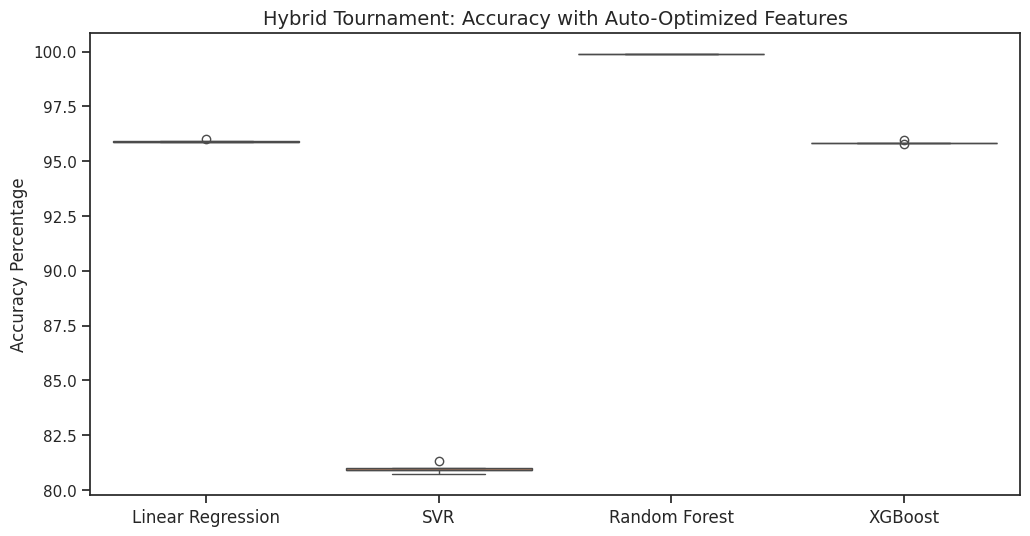

In [4]:
# ==========================================
# 4. HYBRID MODEL TOURNAMENT
# ==========================================
print("\n--- 4. HYBRID MODEL TOURNAMENT ---")


# --- IMPORTS SPECIFIC TO MODELING & SELECTION ---
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# Models
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Feature Selection
from sklearn.feature_selection import RFE, RFECV, SelectKBest, mutual_info_regression



# --- 1. PREPARE DATA ---
initial_drop = ['calories_burned', 'log_calories_burned', 'bmi_calc', 'max_bpm', 'expected_burn']
X_master = df_encoded.drop(columns=initial_drop, errors='ignore')
Y_master = df_encoded['log_calories_burned']

# --- 2. DEFINE OPTIMIZATION FUNCTIONS ---

def optimize_with_rfecv(model, X, y, name):
    """
    Method 2: Uses RFECV to automatically find the best number of features.
    Best for: Linear Regression, Random Forest, XGBoost.
    """
    print(f"   [Optimizing] {name} using Recursive Feature Elimination with Cross-Validation (RFECV)...")
    # Step: 1 means remove 1 feature at a time. Min features: 5.
    selector = RFECV(estimator=model, step=10, cv=3, min_features_to_select=5, scoring='neg_mean_absolute_error')
    selector.fit(X, y)
    print(f"   -> Found optimal features: {selector.n_features_}")
    return selector.n_features_

def optimize_with_elbow(model, X, y, name):
    """
    Method 1: Uses a Loop + Mutual Info to find the best K (Elbow/Best Score)/Grid Search with Univariate Feature Selection (Filter Method).
    Best for: SVR (Non-linear, filter method).
    """
    print(f"   [Optimizing] {name} using Grid Search with Univariate Feature Selection (Filter Method)...")
    best_score = -np.inf
    best_k = 10

    # Test range: 10, 20, 30, 40, 50 (Keep steps larger to save time for SVR)
    # Note: SVR is slow, so we use a subset or larger steps.
    test_range = [10, 20, 30, 40, 50]

    for k in test_range:
        # 1. Select K features using Mutual Info
        selector = SelectKBest(score_func=mutual_info_regression, k=k)
        X_new = selector.fit_transform(X, y)

        # 2. Score (Cross Val)
        scores = cross_val_score(model, X_new, y, cv=3, scoring='neg_mean_absolute_error')
        avg_score = scores.mean()

        # 3. Check if this is the best
        if avg_score > best_score:
            best_score = avg_score
            best_k = k

    print(f"   -> Found optimal features: {best_k}")
    return best_k

# --- 3. CONFIGURE MODELS ---
# We initialize them with placeholders. The 'n_features' will be updated in the next step.
model_configs = {
    "Linear Regression": {
        "model": LinearRegression(),
        "fs_method": "RFE",
        "opt_strategy": "RFECV",  # Use Method 2
        "n_features": 10 # Placeholder
    },
    "SVR": {
        "model": SVR(kernel='rbf'),
        "fs_method": "Mutual Info",
        "opt_strategy": "Elbow",  # Use Method 1
        "n_features": 10 # Placeholder
    },
    "Random Forest": {
        "model": RandomForestRegressor(n_estimators=20, random_state=42, n_jobs=-1),
        "fs_method": "Tree Importance",
        "opt_strategy": "RFECV",  # Use Method 2
        "n_features": 10 # Placeholder
    },
    "XGBoost": {
        "model": XGBRegressor(n_estimators=20, learning_rate=0.1, random_state=42, n_jobs=-1),
        "fs_method": "Tree Importance",
        "opt_strategy": "RFECV",  # Use Method 2
        "n_features": 10 # Placeholder
    }
}

# --- 4. PHASE A: RUN OPTIMIZATION LOOP ---
print("\n--- PHASE A: DETERMINING OPTIMAL FEATURE COUNTS ---")
for name, config in model_configs.items():
    # We use a smaller sample for optimization to speed it up (optional but recommended)
    # Using first 2000 rows for speed. Change to X_master if you want full precision (slower).
    X_sample = X_master.iloc[:2000]
    Y_sample = Y_master.iloc[:2000]

    if config["opt_strategy"] == "RFECV":
        best_k = optimize_with_rfecv(config["model"], X_sample, Y_sample, name)
    else:
        best_k = optimize_with_elbow(config["model"], X_sample, Y_sample, name)

    # UPDATE THE CONFIG
    config["n_features"] = best_k

# --- 5. DEFINE SELECTION HELPER (used in Tournament) ---
def get_best_features(method, model, X, y, n_features):
    if method == "RFE":
        selector = RFE(estimator=LinearRegression(), n_features_to_select=n_features)
        selector.fit(X, y)
        return X.columns[selector.support_]
    elif method == "Mutual Info":
        selector = SelectKBest(score_func=mutual_info_regression, k=n_features)
        selector.fit(X, y)
        return X.columns[selector.get_support()]
    elif method == "Tree Importance":
        rf = RandomForestRegressor(n_estimators=50, random_state=42)
        rf.fit(X, y)
        importances = pd.Series(rf.feature_importances_, index=X.columns)
        return importances.nlargest(n_features).index
    return X.columns

# --- 6. PHASE B: RUN THE TOURNAMENT ---
print("\n--- PHASE B: RUNNING FINAL TOURNAMENT ---")
print("-" * 80)

results_mae = []
results_acc = []
names = []

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for name, config in model_configs.items():
    model = config["model"]
    fs_method = config["fs_method"]
    n_feats = config["n_features"]

    # 1. Get the Features (Using the calculated N_Features)
    cols_used = get_best_features(fs_method, model, X_master, Y_master, n_features=n_feats)
    X_selected = X_master[cols_used]

    # [DISPLAY] Show selected features
    print(f"\n> Model: {name}")
    print(f"  Selection: {fs_method} | Features Kept: {len(cols_used)}")
    print(f"  Features: {list(cols_used)}")

    fold_mae = []
    fold_acc = []

    # 2. Cross Validation
    for train_idx, test_idx in kfold.split(X_selected, Y_master):
        X_train, X_test = X_selected.iloc[train_idx], X_selected.iloc[test_idx]
        y_train, y_test = Y_master.iloc[train_idx], Y_master.iloc[test_idx]

        # Scale
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Train
        model.fit(X_train, y_train)

        # Predict
        y_pred_log = model.predict(X_test)

        # Inverse Log
        y_test_real = np.exp(y_test)
        y_pred_real = np.exp(y_pred_log)

        # Metrics
        mae = mean_absolute_error(y_test_real, y_pred_real)
        errors = np.abs(y_pred_real - y_test_real)
        mape = 100 * np.mean(errors / y_test_real)

        fold_mae.append(mae)
        fold_acc.append(100 - mape)

    results_mae.append(fold_mae)
    results_acc.append(fold_acc)
    names.append(name)

    print(f"  RESULT: MAE: {np.mean(fold_mae):.4f} | Accuracy: {np.mean(fold_acc):.2f}%")

# --- 7. VISUALIZATION ---
plt.figure(figsize=(12, 6))
plt.title('Hybrid Tournament: Accuracy with Auto-Optimized Features', fontsize=14)
sns.boxplot(data=results_acc)
plt.xticks(range(len(names)), names, fontsize=12)
plt.ylabel('Accuracy Percentage', fontsize=12)
plt.show()

In [5]:
import joblib

# ==========================================
# 5. SAVE ASSETS FOR DEPLOYMENT
# ==========================================
print("--- 5. SAVING ALL MODELS & ASSETS ---")

# Define the dictionary to hold paths (so we can load them easily later)
saved_artifacts = {}

for name, config in model_configs.items():
    print(f"Processing {name}...")

    # 1. Get the Best Features for this specific model
    # (We use the logic from the previous Hybrid step)
    cols_used = get_best_features(config["fs_method"], config["model"], X_master, Y_master, n_features=config["n_features"])

    # 2. Create the specific dataset for this model
    X_final = X_master[cols_used]
    Y_final = Y_master # All models use the same Target

    # 3. Fit a Brand New Scaler for this specific feature set
    # (Crucial: Linear Reg needs scaling on its 15 features, RF might need it on its 30)
    final_scaler = StandardScaler()
    X_final_scaled = final_scaler.fit_transform(X_final)

    # 4. Retrain the Model on the FULL dataset
    # (We want the model to learn from 100% of the data now, not just the cross-val folds)
    final_model = config["model"]
    final_model.fit(X_final_scaled, Y_final)

    # 5. Save Artifacts
    # We remove spaces from names for filenames (e.g., "Linear Regression" -> "Linear_Regression")
    safe_name = name.replace(" ", "_")

    joblib.dump(final_model, f'{safe_name}_model.pkl')
    joblib.dump(final_scaler, f'{safe_name}_scaler.pkl')
    joblib.dump(cols_used.tolist(), f'{safe_name}_features.pkl')

    print(f"   -> Saved: {safe_name}_model.pkl, scaler and features.")

print("\nAll models saved successfully!")


--- 5. SAVING ALL MODELS & ASSETS ---
Processing Linear Regression...
   -> Saved: Linear_Regression_model.pkl, scaler, and features.
Processing SVR...
   -> Saved: SVR_model.pkl, scaler, and features.
Processing Random Forest...
   -> Saved: Random_Forest_model.pkl, scaler, and features.
Processing XGBoost...
   -> Saved: XGBoost_model.pkl, scaler, and features.

All models saved successfully!


In [ ]:
# !pip install gradio # Run this if you haven't installed it yet

import gradio as gr
import joblib

# ==========================================
# 6. GRADIO INTERFACE
# ==========================================
print("\n--- 6. STARTING GRADIO APP ---")

# Define the prediction function
def predict_calories(duration, workout_type, experience_level, workout_freq, gender, weight, height, age):

    results = {}

    # 1. PREPARE RAW INPUT DATA
    # We create a dictionary with the inputs.
    # Note: We must handle One-Hot Encoding manually here to match training data.

    input_data = {
        'session_duration (hours)': duration,
        'weight (kg)': weight,
        'height (m)': height,
        'age': age,
        'workout_frequency (days/week)': workout_freq,
        'experience_level': int(experience_level), # Ensure int

        # Manually One-Hot Encode the Categoricals based on user selection
        # (This mimics what pd.get_dummies did during training)
        f'workout_type_{workout_type}': 1,
        f'gender_{gender}': 1
    }

    # Convert to DataFrame
    input_df = pd.DataFrame([input_data])

    # List of models we saved
    model_names = ["Linear_Regression", "SVR", "Random_Forest", "XGBoost"]

    output_str = ""

    # 2. LOOP THROUGH EACH MODEL
    for name in model_names:
        try:
            # Load assets
            model = joblib.load(f'{name}_model.pkl')
            scaler = joblib.load(f'{name}_scaler.pkl')
            features = joblib.load(f'{name}_features.pkl')

            # 3. ALIGN DATA (The Filter)
            # Create a dataframe with the exact columns this model expects
            model_input_df = pd.DataFrame(columns=features)

            # Fill in the values
            for col in features:
                if col in input_df.columns:
                    model_input_df.loc[0, col] = input_df.loc[0, col]
                else:
                    # If the model wants 'workout_type_HIIT' but user picked 'Yoga',
                    # input_df won't have the HIIT column. We fill it with 0.
                    model_input_df.loc[0, col] = 0

            # 4. SCALE
            # Note: We fillNa with 0 just in case, though logic above handles it
            model_input_df = model_input_df.fillna(0)
            input_scaled = scaler.transform(model_input_df)

            # 5. PREDICT
            log_prediction = model.predict(input_scaled)

            # 6. INVERSE TRANSFORM (Log -> Real)
            real_prediction = np.exp(log_prediction)[0]

            results[name] = round(real_prediction, 2)
            output_str += f"{name.replace('_', ' ')}: {real_prediction:.2f} kcal\n"

        except Exception as e:
            output_str += f"{name}: Error ({str(e)})\n"

    return output_str

# --- DEFINE UI INPUTS ---
# Based on your dataset's columns
iface = gr.Interface(
    fn=predict_calories,
    inputs=[
        gr.Slider(minimum=0.5, maximum=5.0, step=0.1, label="Session Duration (Hours)", value=1.0),
        gr.Dropdown(["Yoga", "HIIT", "Cardio", "Strength"], label="Workout Type", value="Cardio"),
        gr.Slider(minimum=1, maximum=3, step=1, label="Experience Level (1-3)", value=1),
        gr.Slider(minimum=1, maximum=7, step=1, label="Workout Frequency (Days/Week)", value=3),
        gr.Radio(["0", "1"], label="Gender (0=Male, 1=Female - *Check your encoding map*)", value="0"),
        gr.Number(label="Weight (kg)", value=70),
        gr.Number(label="Height (m)", value=1.75),
        gr.Number(label="Age", value=25)
    ],
    # NEW CODE
    outputs=gr.Textbox(lines=4, label="Model Predictions"),
    title="🔥 Gym Calorie Prediction (Tournament Edition)",
    description="Enter your workout details. This app will run your data through 4 different AI models (Linear, SVR, RF, XGBoost) using their optimal feature sets."
)

# Launch
iface.launch(debug=True)


--- 6. STARTING GRADIO APP ---
It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://58790a7009cbc1e6d3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


/tmp/ipython-input-579096797.py:65: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  model_input_df = model_input_df.fillna(0)
/tmp/ipython-input-579096797.py:65: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  model_input_df = model_input_df.fillna(0)
/tmp/ipython-input-579096797.py:65: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  model_inpu